In [1]:
#Brianna Solano Aguilar
#Machine Learning for Engineers Final Product
#MNIST Dataset
##################################################################

In [2]:
#importing libarires for models
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

Part A
---

---







11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
Total Samples:  70000
Features per Picture:  784
Sample Format:/n
AxesImage(54,36;334.8x217.44)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  

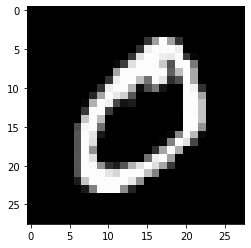

In [3]:
#importing mnist
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print('Total Samples: ', train_X.shape[0]+ test_X.shape[0])
print('Features per Picture: ', train_X.shape[1]*test_X.shape[1])
print("Sample Format:/n")
print(pyplot.imshow(train_X[1],cmap=pyplot.get_cmap('gray')))
print(train_X[1])

MNIST dataset was imported using the keras libaray. It contains a split dataset, that in total incompase 70,000 samples. Samples are divided into two sections, training and testing. With training containing 60,000 samples and training contianing 10,000 smaples. Each sample is a 28 by 28 matrix as the input (x-value) and a 1 collumn matrix serving as the output or label (y-value). There are no missing features since it is an image composed of 28 by 28 pixels. Each feature is catagorical in the sense that they range between 0 to 255 inclusive based on the intesnity of the pixel.With 0 representing white and 255 representing black while values in the middle representing different shade of gray. Each sample contains 784 raw features represented as pixels. 

Histrogram

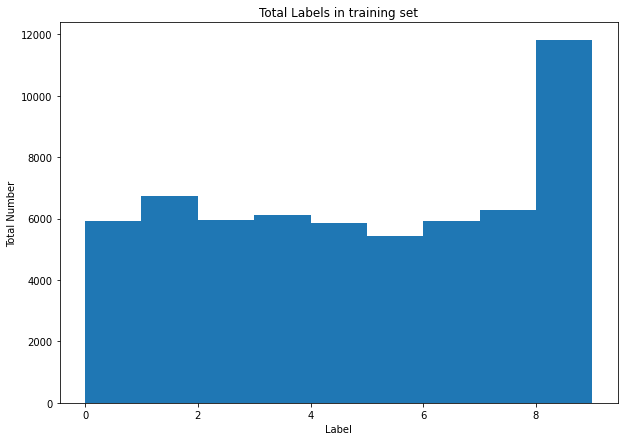

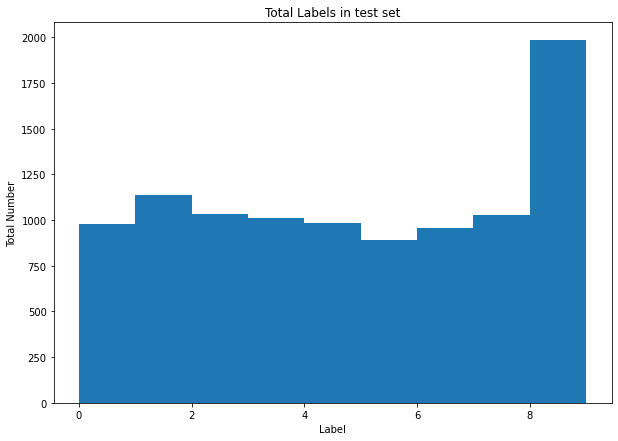

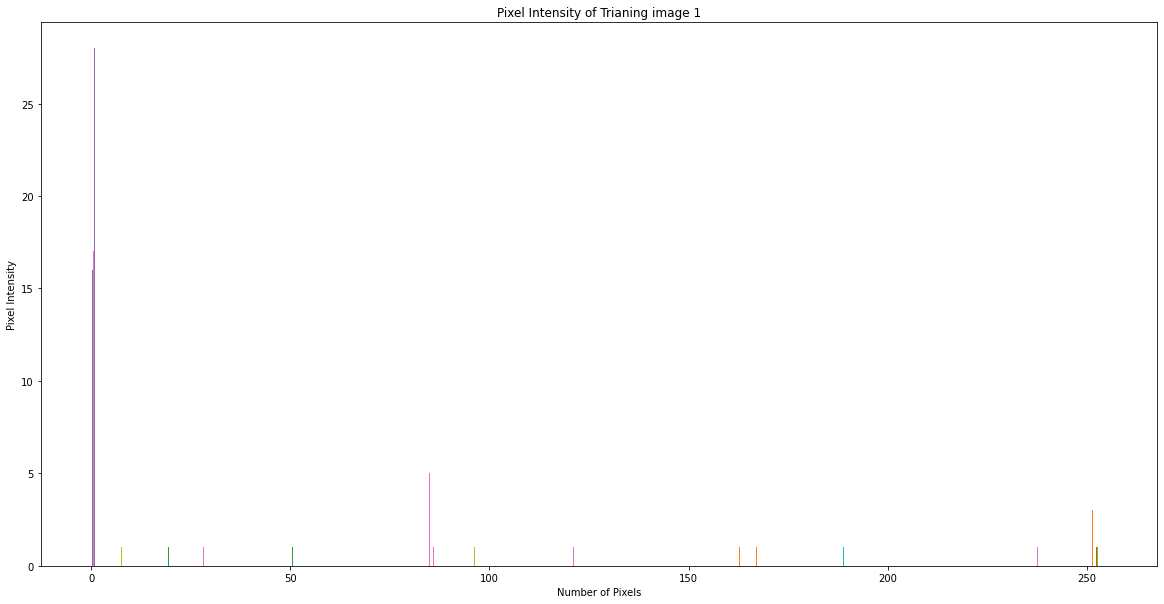

In [4]:
# Creating dataset
a = train_y
# Creating histogram
fig, ax = pyplot.subplots(figsize =(10, 7))
ax.hist(a,bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], histtype = 'bar')
pyplot.xlabel("Label")
pyplot.ylabel("Total Number")
pyplot.title("Total Labels in training set")
# Show plot
pyplot.show()

# Creating dataset
a = test_y
# Creating histogram
fig, ax = pyplot.subplots(figsize =(10, 7))
ax.hist(a,bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], histtype = 'bar')
pyplot.xlabel("Label")
pyplot.ylabel("Total Number")
pyplot.title("Total Labels in test set")
# Show plot
pyplot.show()

a = train_X[1]
# Creating histogram
fig, ax = pyplot.subplots(figsize =(20, 10))
ax.hist(a,bins = 256, histtype = 'bar')
pyplot.xlabel("Number of Pixels")
pyplot.ylabel("Pixel Intensity")
pyplot.title("Pixel Intensity of Trianing image 1")
# Show plot
pyplot.show()


# Part B


---



Pre-processing of each dataset:

In [5]:
train_X = tf.keras.utils.normalize(train_X, axis=1) #normalize
test_X = tf.keras.utils.normalize(test_X, axis=1) #normalize

To preform KNN with images, all images must be preprocessed such that they contain a fixed feature vector size. In this case, MNIST is already preprocessed in that sense. Each image is a 28 by 28 pixel image that is greyscaled. Meaning there is only one channel and pixel values range from 0 to 255 in value. Further processing needs to be done which is shown above. Rather then having the values of the pixels range from 0 to 255, the images are normailzed. This wold ensure that eahc pixel has similiar data distribution. The distribution would resemble a Gussain that would be centered on 0 with a standard deiviation of 1. Pixel values would now range from 0 to 1 rather then 0 to 255. Since we are working with a large pool of samples, it would become computationally heavy for a computer to compute mathematical expressions with values that range 0 to 255. Therefore to reduce computational power and time of convergence, we range the values from 0 to 1 by normalizing.


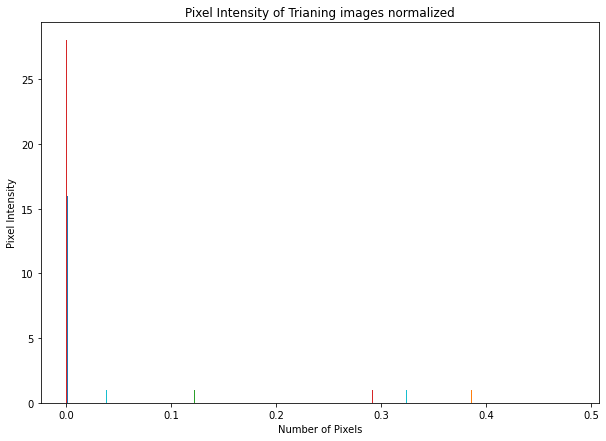

In [6]:
a = train_X[1]
# Creating histogram
fig, ax = pyplot.subplots(figsize =(10, 7))
ax.hist(a,bins = 256, histtype = 'bar')
pyplot.xlabel("Number of Pixels")
pyplot.ylabel("Pixel Intensity")
pyplot.title("Pixel Intensity of Trianing images normalized")
# Show plot
pyplot.show()

In [7]:
from sklearn.decomposition import PCA
num_pixels = train_X.shape[1] * train_X.shape[2]
X_train = train_X.reshape((train_X.shape[0], num_pixels)).astype('float32')
X_test = test_X.reshape((test_X.shape[0], num_pixels)).astype('float32')
print(X_train.shape)
print(X_test.shape)
Totaldata = np.concatenate((X_train,X_test),axis=0)
Totaloutput = np.concatenate((train_y,test_y),axis=0)
print(Totaldata.shape)
print(Totaloutput.shape)

(60000, 784)
(10000, 784)
(70000, 784)
(70000,)


Rather then dealing with a 3 dimensional matrix, I reshape both the training and testing data such that it's a 60000 by 784 matrix for the training data rather then a 60000 by 28 by 28. Then both datasets are concatated to a single dataset which contain both the samples from the training set and smaples from the test set. 

# Part C


---



Feature Extraction

Perform PCA to reduce the dimension of the images

In [8]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(Totaldata)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3'])
label = pd.DataFrame(train_y, columns = ['label'])
finalDf = pd.concat([principalDf, label], axis = 1)
finalDf

,PC1,PC2,PC3,label
0,0.755066,0.020550,0.174233,5.0
1,0.510048,1.187185,1.498541,0.0
2,-0.729870,-0.230845,0.148678,4.0
3,1.609278,-1.638210,-0.048888,1.0
4,-1.278680,-0.839577,0.456259,9.0
...,...,...,...,...
69995,0.717287,0.214207,-0.828246,NaN
69996,0.787781,1.355767,-0.929142,NaN
69997,-0.773432,-1.075768,0.458385,NaN
69998,0.200467,-0.509245,1.058781,NaN


Principle component anaylisis is conducted on the mnist dataset. Performing the caluclations such as matrix multiplcation,eigenvlaues and eigenvectors, proved to be challanging to accomplish due the data being so large. Multiple attempts were taken in accomplishing this task, but it only lead to the computer crashing for lack of ram. Therefore, sklearn learn was used which contains a built in PCA function. Performing PCA, allowed me to lower the dimension of the dataset greatly. Rather then dealing with a dataset that was 600 by 784, PCA allowed me to obtain a dataset that was 6000 by 3. When using the function, we first state how many principle components we would like from the data. This is done by obtaining the 3 largest eigen values with their corresponding eigenvectors. Once stated, we call the function based on the data we input, in this case it's the MNIST data transformed into a 6000 by 784 matrix.  This function calauclted the confusion matrix which is normalized data times its transpose. It then goes on to calculating egienvalues and egienvectors. If the computed eigenvalue is large, then their corresponding eigenvector contains important data dependcies. Unlike lower valued eigenvalues, such as eigenvalues near zero, which are relatively unimportant and that data depends on fewer components. Here PCA is taken with only the 3 largest eigenvalues, and ploted below in a 2D and 3D plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


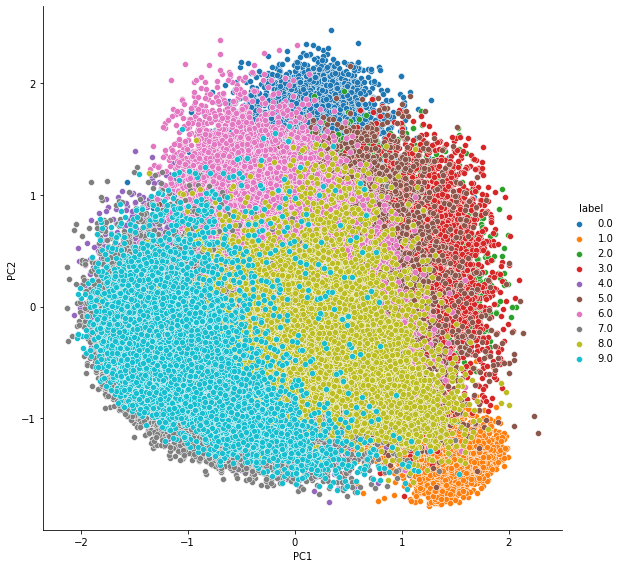

In [9]:
sns.FacetGrid(finalDf, hue = 'label', size = 8) \
  .map(sns.scatterplot, 'PC1', 'PC2',) \
  .add_legend()

(70000, 4)


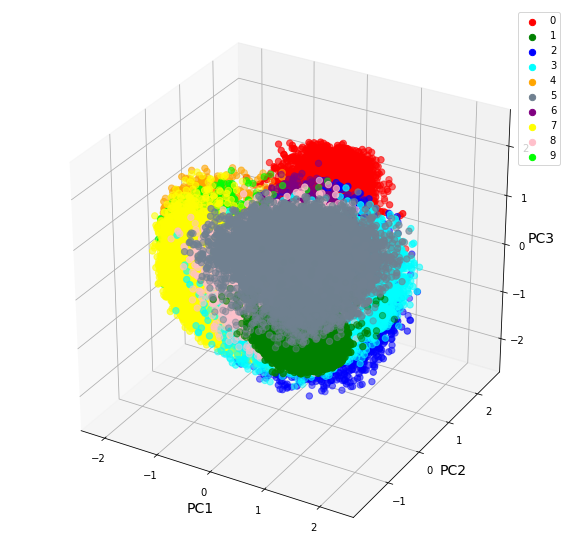

In [10]:
finalDf = finalDf.to_numpy()
print(finalDf.shape)
Xax = finalDf[:,0]
Yax = finalDf[:,1]
Zax = finalDf[:,2]

cdict = {0:'red',1:'green',2:'blue',3:'cyan',4:'orange',5:'slategray',6:'purple',7:'yellow',8:'pink',9:'lime'}
labl = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(train_y):
 ix=np.where(train_y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l])
# for loop ends
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

ax.legend()
pyplot.show()

From the above figure, you can observe that some variation was captures by the principal components since there is some structure in the points when projected along the two principal components. The same can be said when the points are project alond the three principal components. The points belonging to the same class are close to each other, ans the points or images that are very different are relatively different are further away from each other. We seek a PCA value that gives us the highest varience in the data. Therefore we set a thershold in our PCA function that obtains n highest egienvalues with their corresponding eigenvectors that give us a varience between 80% and 99%. 

In [11]:
pca = PCA(n_components=.80)
principalComponent = pca.fit_transform(Totaldata)
print(principalComponent.shape)

(70000, 67)


To achieve a varience of 80%, it was determined that I would need 67 principle components which is still a reduction of the previous data (784 features). A 91% reduction from the orgiainl data. 

# Part D


---



# Logistic Regression One vs All

For this model, binary Logisitic Regression will be implemented in 10 seperate models, for each class in the MNIST data set (numbers 0 though 9). 10 new datasets will need to be create treating labels that are in the corresponding model as 1 and any other label as 0. An example would be for model 0, all labels assocaited with 0 will be relabeled as 1 and anyother label that is not 0 will be labeled 0. Each model will be trained using training dataset. Predictions will be made using the test data set, with each image passing through each model. The maximum probability out of all the models will be chosen and the corresponding label will be assaigned to that image. 

In [12]:
#split the data into test and train
Split = np.split(principalComponent, [50000])
Split1 = np.split(Totaloutput, [50000])
X_train = Split[0]
X_test = Split[1]
Y_train = Split1[0]
Y_test = Split1[1]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 67)
(20000, 67)
(50000,)
(20000,)


In [13]:
#principalComponentstrain
#train_y
#principalComponentstest
#test_y
#New datasets will be created for each model
#Dataset 0
label0 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 0):
    label0[i] = 1
  else:
    label0[i] = 0

label1 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 1):
    label1[i] = 1
  else:
    label1[i] = 0

label2 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 2):
    label2[i] = 1
  else:
    label2[i] = 0

label3 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 3):
    label3[i] = 1
  else:
    label3[i] = 0

label4 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 4):
    label4[i] = 1
  else:
    label4[i] = 0

label5 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 5):
    label5[i] = 1
  else:
    label5[i] = 0

label6 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 6):
    label6[i] = 1
  else:
    label6[i] = 0

label7 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 7):
    label7[i] = 1
  else:
    label7[i] = 0

label8 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 8):
    label8[i] = 1
  else:
    label8[i] = 0

label9 = np.zeros(50000)
for i in range (50000):
  if (Y_train[i] == 9):
    label9[i] = 1
  else:
    label9[i] = 0

In [14]:
#Add a collumn of 1s to account for the intercept
ones = np.ones((50000, 1))
X = np.concatenate((ones, X_train), axis=1)
print(X.shape)
ones = np.ones((20000, 1))
X_test = np.concatenate((ones, X_test), axis=1)
print(X_test.shape)

(50000, 68)
(20000, 68)


# Model 0 trained on 0 label

In [15]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta0 = np.zeros(68)

def sigmoid(predictedtheta0,X):
    z=X.dot(predicttheta0.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta0,X[j])
    sum = sum + (label0[j] - g)*X[j]
  predicttheta0 = predicttheta0 + learningrate * sum
print("Final Coefficients shape = ", predicttheta0.shape)
print("Final Coefficients = ", predicttheta0)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.99242577e+00  9.43416025e-02  8.67202134e-01  5.37517324e-01
 -4.25615086e-01  8.97067177e-02 -3.21285065e-01  4.40236185e-01
 -5.94027849e-02 -4.55288321e-02 -1.58996430e-03 -1.35806415e-01
 -8.45398175e-02  1.93319356e-01 -1.77674506e-01  2.12316681e-02
 -7.00263737e-02 -7.02419375e-02 -2.67336343e-02 -1.38975158e-04
  4.24025232e-02 -8.16370459e-02 -3.00272388e-02 -7.79439871e-02
  1.66074441e-02  6.47610758e-02 -3.04554229e-02  3.60029592e-02
  1.74738781e-02  1.86959891e-03  2.31476554e-02  7.72310730e-02
  4.18596483e-02 -2.70088291e-02 -1.59395912e-02 -1.72095162e-02
  2.97315589e-02  4.00155764e-02  3.43886970e-02 -2.84148448e-02
 -1.36968318e-02 -5.69785821e-02  3.13201394e-02 -6.41391695e-04
  4.70038218e-02 -1.17264293e-02 -1.83968082e-02  2.80684910e-02
 -4.83278997e-04  2.72040243e-02  3.28665472e-02 -1.33397946e-02
 -2.23372583e-02 -3.14139468e-02  2.50126530e-02 -1.32547227e-02
 -3.65221765e-02  6.86897415e-03 -

# Model 1 trained on 1 label

In [16]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta1 = np.zeros(68)

def sigmoid(predictedtheta1,X):
    z=X.dot(predicttheta1.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta1,X[j])
    sum = sum + (label1[j] - g)*X[j]
  predicttheta1 = predicttheta1 + learningrate * sum
print("Final Coefficients shape = ", predicttheta1.shape)
print("Final Coefficients = ", predicttheta1)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.92152138e+00  6.27309605e-01 -7.34870229e-01 -4.78141108e-01
  2.07828796e-01 -1.31598654e-01 -4.62251109e-01  5.12320188e-01
 -1.40074975e-01  3.68326855e-02  2.07039959e-01 -1.62263874e-02
  2.56588170e-01 -1.82561141e-02 -2.93630289e-02 -8.78785635e-02
 -8.33548450e-02  9.56194521e-02  1.34285712e-01  1.43944271e-01
  1.07879221e-03 -1.46722151e-02 -1.44918083e-02  4.16661150e-02
 -4.81758083e-02  1.82226081e-02  1.02440998e-01 -4.88793811e-02
 -8.72207869e-03 -6.54707230e-02  6.96951581e-02  2.69076738e-02
  2.14728746e-02 -2.21611150e-02  2.45188172e-02 -5.30102779e-02
 -3.95521043e-02  3.23393684e-02  4.85440347e-02  4.86781175e-02
 -8.00463919e-03  1.17601983e-02 -5.82682265e-02  1.36572292e-02
 -6.11754141e-03  4.54126272e-02  5.17426187e-02  4.83558299e-02
 -1.44303354e-02 -8.74648087e-02 -2.71809340e-02  3.87343595e-02
 -8.46049095e-04  2.49366192e-02 -1.72252990e-02  1.12837505e-02
  5.03445329e-02 -1.37447944e-02 -

# Model 2 trained on 2 label

In [17]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta2 = np.zeros(68)

def sigmoid(predictedtheta2,X):
    z=X.dot(predicttheta2.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta2,X[j])
    sum = sum + (label2[j] - g)*X[j]
  predicttheta2 = predicttheta2 + learningrate * sum
print("Final Coefficients shape = ", predicttheta2.shape)
print("Final Coefficients = ", predicttheta2)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.94242016e+00  4.27347722e-01  2.81711588e-01 -1.26446261e-01
  5.42549489e-01  6.51540528e-01  1.64873399e-01 -3.15371273e-01
 -1.31695467e-01  1.25697580e-01 -1.15066114e-01 -2.33006138e-01
 -1.30461829e-01 -1.46089050e-01 -1.25386519e-01 -7.92865906e-02
  7.55634652e-02  1.45473149e-01 -2.05981919e-01  1.83671534e-02
  5.05688044e-02  5.76879251e-02  3.01306750e-02 -7.30418514e-03
  4.61954131e-02 -3.97838702e-02  5.59400464e-02 -1.11627979e-01
 -3.91475021e-02 -2.94895798e-03  8.85268033e-02 -1.02310899e-02
  1.20303408e-02 -5.74252728e-03  2.77859395e-02  4.55804241e-02
  4.54571603e-02 -3.70209148e-02 -2.64309561e-02 -3.66488179e-02
  2.52318671e-02 -3.05626997e-02 -3.71144409e-02  5.08362737e-02
 -1.44307701e-02  1.49350277e-02 -3.78248628e-03  2.56017591e-04
 -2.75116219e-02  1.36106681e-02  1.08935153e-02  1.47099016e-02
  1.16447892e-02  1.96763289e-03 -3.84746924e-02 -5.34922950e-03
 -1.80799260e-02 -8.60192651e-03  

# Model 3 trained on 3 label

In [18]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta3 = np.zeros(68)

def sigmoid(predictedtheta3,X):
    z=X.dot(predicttheta3.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta3,X[j])
    sum = sum + (label3[j] - g)*X[j]
  predicttheta3 = predicttheta3 + learningrate * sum
print("Final Coefficients shape = ", predicttheta3.shape)
print("Final Coefficients = ", predicttheta3)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.92737879e+00  5.12852384e-01  2.01914046e-01 -3.64121565e-01
 -5.21046145e-01 -1.80385761e-01  2.23889141e-01 -4.85541932e-01
  2.62986574e-01 -1.47970108e-01  8.96526235e-02  1.84574208e-01
 -4.69889447e-02  5.36497093e-03 -1.56947339e-01 -1.48439813e-01
 -2.01813450e-01  8.34266249e-03 -5.46457648e-02 -2.77073206e-02
 -4.71773965e-02  6.33576730e-02 -1.46189001e-01 -6.49820943e-02
 -2.75627010e-02 -5.86635468e-02  1.12264909e-02 -5.13879366e-02
  3.02938835e-02 -5.45373391e-02 -7.72880790e-02 -2.40411034e-02
  4.46560830e-03 -2.69728522e-02  2.14875260e-02  3.83017102e-02
 -4.52832080e-04 -4.11278226e-03 -3.80831886e-02 -3.34773822e-02
 -2.70456465e-02  6.03619096e-02 -1.95624389e-02 -7.56920727e-03
 -4.86886637e-02  4.77952780e-02  9.69671942e-03 -4.82739453e-02
 -5.02289839e-03 -1.47578763e-02 -2.67978714e-02  6.93432339e-03
  8.46613093e-03 -3.76447173e-02  3.09127324e-02  1.74251875e-02
  3.79523189e-02 -1.13306834e-05  

# Model 4 trained on 4 label

In [19]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta4 = np.zeros(68)

def sigmoid(predictedtheta4,X):
    z=X.dot(predicttheta4.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta4,X[j])
    sum = sum + (label4[j] - g)*X[j]
  predicttheta4 = predicttheta4 + learningrate * sum
print("Final Coefficients shape = ", predicttheta4.shape)
print("Final Coefficients = ", predicttheta4)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.96570692e+00 -6.20828041e-01 -2.18767087e-01  1.19398422e-01
  4.92344655e-01 -2.26807550e-01  5.50166555e-01  1.09957718e-01
  1.79046531e-01 -1.44728753e-01  1.71297980e-01  1.57983870e-02
  6.78276558e-02 -1.49833958e-01 -2.14910760e-01  1.58342531e-01
 -1.27145937e-01  9.76322699e-02  1.07289467e-01 -7.09972247e-02
 -7.59909969e-02 -9.66420048e-02  2.32297516e-02 -3.62198103e-03
  1.21198094e-02 -6.19397999e-02 -3.18443482e-02  5.78563828e-02
  1.55873809e-04  2.76675126e-02  5.51590324e-03 -6.58123936e-03
 -2.71191040e-02  8.08289394e-02  2.21677612e-02 -1.23846625e-02
 -1.52343384e-03 -4.38514527e-02 -3.70015844e-02  5.58862996e-02
 -2.12168021e-02 -2.17505063e-02  3.46829472e-02 -7.23566167e-03
  4.91032736e-03  3.02301423e-02 -2.90414018e-02 -4.47617894e-02
 -3.20120211e-02 -1.06377472e-02  1.01681036e-02 -1.48194916e-02
  1.21295279e-03 -2.26383961e-02  3.29439170e-02 -1.73376573e-02
 -1.44641817e-02  3.34259082e-03  

# Model 5 trained on 5 label

In [20]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta5 = np.zeros(68)

def sigmoid(predictedtheta5,X):
    z=X.dot(predicttheta5.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta5,X[j])
    sum = sum + (label5[j] - g)*X[j]
  predicttheta5 = predicttheta5 + learningrate * sum
print("Final Coefficients shape = ", predicttheta5.shape)
print("Final Coefficients = ", predicttheta5)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.95446284e+00  2.15367776e-01  5.98063066e-02  2.20836945e-01
 -4.23780905e-01 -3.74932818e-01  1.59358592e-01 -1.38434419e-03
  1.81964299e-01  1.64044660e-01 -4.86922989e-02 -1.93763959e-01
 -1.30081765e-03 -3.13880214e-01  1.73300563e-01  5.13258356e-02
  1.04088737e-01 -4.60219311e-02  7.24532427e-02 -1.19208502e-01
 -1.77317547e-02 -1.47901931e-02  7.25325452e-02  1.80247890e-01
 -1.83106361e-02  6.49944697e-02 -8.83711989e-03  1.09600794e-01
 -3.97357660e-02 -1.69174313e-02  1.04709469e-01  3.52561224e-02
 -3.38703845e-02  1.77616544e-02  3.29425278e-03 -2.23432911e-02
  3.35693097e-02 -8.87493722e-03  3.19317398e-02  5.54266183e-02
  7.29412406e-03 -1.29122309e-02  5.91857182e-03 -4.95630183e-02
  1.39293022e-02 -5.58476674e-02 -2.96327062e-03 -2.45605290e-02
  3.27390614e-02  6.97890444e-02 -1.65485318e-02  1.02103956e-02
  3.58602928e-02  6.88940384e-02 -1.52353866e-02 -1.26805539e-02
  1.89902238e-02  2.21504911e-02 -

# Model 6 trained on 6 label

In [21]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta6 = np.zeros(68)

def sigmoid(predictedtheta6,X):
    z=X.dot(predicttheta6.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta6,X[j])
    sum = sum + (label6[j] - g)*X[j]
  predicttheta6 = predicttheta6 + learningrate * sum
print("Final Coefficients shape = ", predicttheta6.shape)
print("Final Coefficients = ", predicttheta6)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.95664640e+00 -9.19120461e-02  4.97089797e-01 -7.22168814e-02
  8.44490169e-01 -3.08841400e-01 -2.50346388e-01 -1.39894842e-01
 -1.69952377e-01 -5.47798026e-02 -6.62118276e-02  2.49541552e-01
  8.48537687e-02 -7.88482880e-02  2.29358228e-01  1.33181739e-01
  1.36420776e-01 -3.23028034e-01  4.15269883e-02  1.05320893e-01
  1.05317231e-02 -1.70887855e-02  5.16101394e-02 -6.00731982e-02
 -3.26501344e-02  6.69958397e-02 -3.32484124e-02  4.28778354e-02
 -9.71080501e-04 -1.34290264e-02 -1.14967626e-01  9.22290667e-03
  2.01139432e-02 -8.34749857e-03 -6.81017801e-02  1.03302037e-02
 -5.63649167e-03 -2.57253828e-02  1.75107876e-02 -7.13916653e-03
  1.51133018e-02  7.22234014e-03 -5.76461851e-04 -7.02675235e-02
  3.29149158e-02 -6.12449186e-02 -9.46193824e-03  4.06070005e-02
  4.57676576e-02  3.48326176e-02 -1.91938524e-02 -3.36010260e-02
 -2.33250233e-02 -1.06079085e-02  6.28492264e-05  2.00782388e-02
  4.09693950e-02 -1.25828330e-02  

# Model 7 trained on 7 label

In [22]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta7 = np.zeros(68)

def sigmoid(predictedtheta7,X):
    z=X.dot(predicttheta7.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta7,X[j])
    sum = sum + (label7[j] - g)*X[j]
  predicttheta7 = predicttheta7 + learningrate * sum
print("Final Coefficients shape = ", predicttheta7.shape)
print("Final Coefficients = ", predicttheta7)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.95134674e+00 -6.84967649e-01 -4.35013080e-01 -2.56221344e-02
 -4.69786093e-01  4.35577715e-01 -5.94084238e-01 -2.66776890e-01
  2.23867917e-02  1.29130384e-01 -9.10592692e-02  2.29807539e-01
 -1.10716666e-01 -3.99874807e-02 -1.60115244e-02  1.35274005e-01
 -9.25852565e-02  9.97650920e-02  1.02853189e-03 -1.54511608e-02
 -1.23653659e-01 -6.15340141e-02 -2.12349742e-02  2.38137752e-03
 -1.89841403e-03 -2.61115932e-03  7.37750605e-03 -3.33672381e-02
 -7.48948847e-02 -8.43899897e-03 -3.84364390e-02  2.26856061e-02
  1.16071327e-03 -5.59371732e-02 -2.53808027e-02  4.13287147e-02
  5.52760805e-02 -8.02011557e-03  2.70999574e-02 -4.90076058e-04
  1.18247641e-02  1.33005554e-02  2.65273220e-02  1.27084312e-02
  3.53977979e-03 -7.58904423e-03 -4.72230278e-02 -2.17349787e-02
  2.52348904e-02  1.83695163e-02  1.46155710e-02 -2.43700261e-02
 -3.89978790e-03 -1.19551860e-02 -2.14593018e-02  8.08905650e-03
 -2.34018927e-02  3.04098527e-03  

# Model 8 trained on 8 label

In [23]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta8 = np.zeros(68)

def sigmoid(predictedtheta8,X):
    z=X.dot(predicttheta8.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta8,X[j])
    sum = sum + (label8[j] - g)*X[j]
  predicttheta8 = predicttheta8 + learningrate * sum
print("Final Coefficients shape = ", predicttheta8.shape)
print("Final Coefficients = ", predicttheta8)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.90486759e+00  1.89867151e-01 -2.24111232e-01  1.05927034e-01
 -2.34483924e-01  1.45597080e-01  4.20425134e-01 -6.54628434e-02
 -1.75057151e-01  4.34604540e-02 -9.32155546e-02 -9.19918497e-02
  1.35902130e-01  3.31823704e-01  2.99771948e-01  1.23735626e-01
  1.07411142e-01 -1.78349103e-01  1.02915843e-01 -1.05290948e-01
  4.39331389e-02  6.38039993e-02  1.64636987e-01  4.61822570e-02
  7.59115398e-02 -1.08825150e-01 -2.14549175e-02  3.91917034e-02
  7.69913476e-02  7.59533046e-02 -7.50345189e-03 -1.09363263e-01
  2.94043092e-02  6.54736920e-02 -2.06968995e-02  2.39661482e-02
 -6.87446768e-02  6.09152969e-02 -5.31774277e-02 -5.02954763e-03
  6.61999872e-02 -3.12344841e-02  2.11345634e-03  1.31211942e-02
 -2.60109432e-02 -1.54396221e-02  6.20857628e-02  5.27877349e-02
 -2.18246562e-02 -9.23217914e-03  1.48921037e-02  3.99113690e-02
  1.23894327e-03  2.20987642e-02  3.62973680e-02 -9.85387428e-03
 -1.15516258e-02  4.92691060e-03 -

# Model 9 trained on 9 label

In [24]:
m = 50000
iterations = 142
learningrate = 0.1/m
predicttheta9 = np.zeros(68)

def sigmoid(predictedtheta9,X):
    z=X.dot(predicttheta9.T)
    z = 1/(1+np.exp(-z)) 
    return z 
    

for i in range(iterations):
  sum = 0
  for j in range(m):
    g = sigmoid(predicttheta9,X[j])
    sum = sum + (label9[j] - g)*X[j]
  predicttheta9 = predicttheta9 + learningrate * sum
print("Final Coefficients shape = ", predicttheta9.shape)
print("Final Coefficients = ", predicttheta9)

Final Coefficients shape =  (68,)
Final Coefficients =  [-1.93012706e+00 -6.83221292e-01 -3.42049597e-01  2.01558278e-02
 -2.83008238e-02 -1.92229379e-01  1.71806812e-01  1.24117718e-01
 -1.22976337e-01 -1.14875306e-01 -1.17427670e-01 -9.56621135e-03
 -1.37936055e-01  1.75662195e-01  1.54277629e-03 -2.73611190e-01
  1.76909365e-01  1.23137931e-01 -1.78559194e-01  1.45380092e-03
  1.13500260e-01  1.18436715e-01 -1.42163456e-01 -5.72282638e-02
 -9.89017127e-03  2.61708000e-02 -6.20279784e-02 -3.22034028e-02
  6.16350163e-02  3.86282953e-02 -2.73215819e-02 -3.33384888e-02
 -8.20290691e-02 -1.67611583e-02  1.58490255e-02 -5.93062824e-02
 -4.71243837e-02  2.45268379e-02 -5.82299579e-03 -3.25472437e-02
 -6.13950264e-02  3.99979592e-02  8.56208817e-03  1.85625108e-02
  1.46377950e-02  9.35017550e-03 -8.63808893e-03 -2.38736898e-02
  5.66304053e-03 -3.48717806e-02  1.15677152e-03 -1.36213208e-02
 -1.07426982e-02  1.11065836e-02 -1.92598961e-02  6.28717715e-03
 -3.70958827e-02  7.55372432e-04 -

Model Test

In [25]:
from numpy.ma.core import argmax

def sigmoidtest(predictedtheta,X):
    z=X.dot(predictedtheta.T)
    z = 1/(1+np.exp(-z)) 
    return z 

LogPredictionAll = np.zeros(20000)
LogPredictionPart = np.zeros(1000)
probab = np.zeros(10)
errorAll = 0
errorPart = 0
for i in range(20000):
  probab[0] = sigmoidtest(predicttheta0,X_test[i])
  probab[1] = sigmoidtest(predicttheta1,X_test[i])
  probab[2] = sigmoidtest(predicttheta2,X_test[i])
  probab[3] = sigmoidtest(predicttheta3,X_test[i])
  probab[4] = sigmoidtest(predicttheta4,X_test[i])
  probab[5] = sigmoidtest(predicttheta5,X_test[i])
  probab[6] = sigmoidtest(predicttheta6,X_test[i])
  probab[7] = sigmoidtest(predicttheta7,X_test[i])
  probab[8] = sigmoidtest(predicttheta8,X_test[i])
  probab[9] = sigmoidtest(predicttheta9,X_test[i])
  if (argmax(probab) != Y_test[i]):
    errorAll +=1
  LogPredictionAll[i] = argmax(probab)
probab = np.zeros(10)
for j in range(1000):
  probab[0] = sigmoidtest(predicttheta0,X_test[j])
  probab[1] = sigmoidtest(predicttheta1,X_test[j])
  probab[2] = sigmoidtest(predicttheta2,X_test[j])
  probab[3] = sigmoidtest(predicttheta3,X_test[j])
  probab[4] = sigmoidtest(predicttheta4,X_test[j])
  probab[5] = sigmoidtest(predicttheta5,X_test[j])
  probab[6] = sigmoidtest(predicttheta6,X_test[j])
  probab[7] = sigmoidtest(predicttheta7,X_test[j])
  probab[8] = sigmoidtest(predicttheta8,X_test[j])
  probab[9] = sigmoidtest(predicttheta9,X_test[j])
  if (argmax(probab) != Y_test[j]):
    errorPart +=1
  LogPredictionPart[j] = argmax(probab)
precenterrorAll = errorAll/20000
precenterrorPart = errorPart/1000
print("Error tested on 20000 samples:", precenterrorAll)
print("Error tested on 1000 samples:", precenterrorPart)
print("Percent Error on 20000 samples:", precenterrorAll*100, "%")
print("Percent Error on 1000 samples:", precenterrorPart*100, "%")

Error tested on 20000 samples: 0.17775
Error tested on 1000 samples: 0.208
Percent Error on 20000 samples: 17.775 %
Percent Error on 1000 samples: 20.8 %


# Machine Learning Method 1 (KNN)

K neighed neighbor algorithm is easy to implement but it’s computationlly, especially for images, not very efficient. When we have 60000 samples, every new data point, which we want to label, we need to go and find it’s distance with the 60,000 training samples we have. That’s very inefficient and take a lot of time. Therefore, we reduce the the number of samples we would use for training by 10,000 samples

In [26]:
Split = np.split(principalComponent, [50000])
Split1 = np.split(Totaloutput, [50000])
X_train = Split[0]
X_test = Split[1]
Y_train = Split1[0]
Y_test = Split1[1]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 67)
(20000, 67)
(50000,)
(20000,)


In [27]:
from scipy import stats as s

def KNN(test,train):
  count = 0
  dist = np.zeros((1000,50000))
  for j in range(1000):
    for i in range(50000):
      sub = test[j][:]-train[i][:]
      dist[j,i] = np.linalg.norm(sub)
  return dist


def error(k,dist):
  count = 0
  labels = np.zeros(k)
  for i in range(1000):
    ind = np.argpartition(dist[i],k-1)[:k]
    min_values = Y_train[ind]
    MostCommon = int(s.mode(min_values)[0])
    if MostCommon != Y_test[i]:
      count = count+1
  error = count/1000
  return error

dist = KNN(X_test,X_train)

The distances are calculated and the k lowest distances are taken with their corresponding label. We formulate a mjority vote system that would take the most frequent label in the k smallest distances and that would be considered the label of the test sample. 

In [28]:
results = np.zeros(50)
j = 0
for i in range(1,51):
  result = error(i,dist)
  results[j] = result
  j = j+1

[0.044 0.044 0.035 0.036 0.037 0.037 0.038 0.038 0.04  0.042 0.043 0.044
 0.045 0.047 0.047 0.043 0.047 0.045 0.046 0.045 0.044 0.046 0.045 0.044
 0.047 0.045 0.048 0.046 0.046 0.048 0.049 0.052 0.051 0.051 0.052 0.055
 0.054 0.055 0.056 0.056 0.055 0.058 0.061 0.058 0.059 0.059 0.062 0.062
 0.064 0.064]


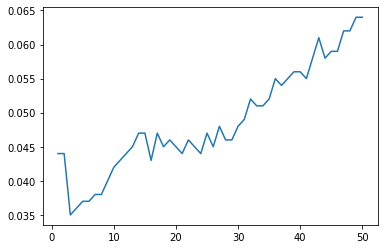

In [29]:
print(results)
k_vec = np.arange(1,51)
pyplot.plot(k_vec,results)

The error rate is calulated over k values ranging from 1 to 50. We notice that at K = 3, the model has the lowest error with K values rangeing from 1 to 50. Therefore a value of 3 will be chosen in our final KNN model. 

In [30]:
def prediction(dist):
  predict = np.zeros(1000)
  for i in range(1000):
    ind = np.argpartition(dist[i],3-1)[:3]
    min_values = Y_train[ind]
    MostCommon = int(s.mode(min_values)[0])
    predict[i] = MostCommon
  return predict

KNNpredict = prediction(dist)

# Part E


---



Comparison of KNN and Logistic Regession models 

Confusion Matrix

In [31]:
#Confusion Matrix KNN
y_actu = pd.Series(Y_test[0:1000], name='Actual')
y_pred = pd.Series(KNNpredict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
Actual,,,,,,,,,,,
0,100,0,0,0,0,0,0,0,0,0,100
1,0,107,0,0,0,0,0,0,0,0,107
2,0,1,91,1,0,0,0,0,0,0,93
3,0,0,1,96,0,2,0,0,4,2,105
4,0,0,0,0,87,0,0,0,0,2,89
5,0,0,0,3,0,88,0,0,0,0,91
6,1,1,0,0,0,0,102,0,0,0,104
7,0,2,1,0,0,0,0,103,0,0,106
8,1,1,0,2,0,1,0,0,102,0,107


In [32]:
#Confusion Matrix Logist Regression 1000 Test Samples
y_actu = pd.Series(Y_test[0:1000], name='Actual')
y_pred = pd.Series(LogPredictionPart, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
Actual,,,,,,,,,,,
0,94,0,0,0,0,0,6,0,0,0,100
1,0,101,0,0,1,0,3,2,0,0,107
2,1,8,73,3,0,0,3,3,2,0,93
3,2,1,2,91,0,0,2,0,3,4,105
4,0,2,0,0,76,0,5,0,0,6,89
5,5,2,0,29,1,40,1,2,5,6,91
6,1,9,1,0,0,2,91,0,0,0,104
7,5,7,0,3,0,0,1,86,1,3,106
8,0,10,1,14,1,1,1,6,64,9,107


[Text(0.5, 1.0, 'Logistic Regession')]

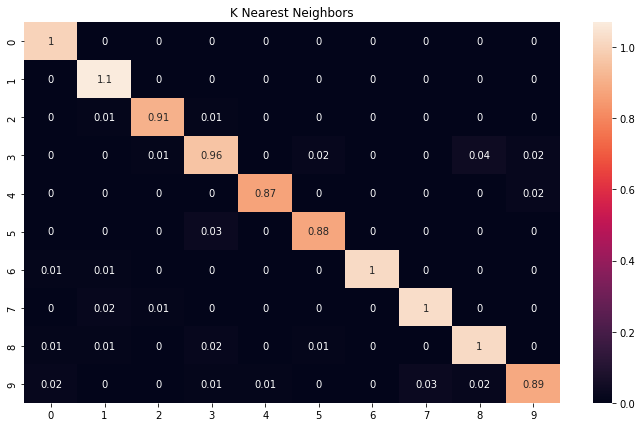

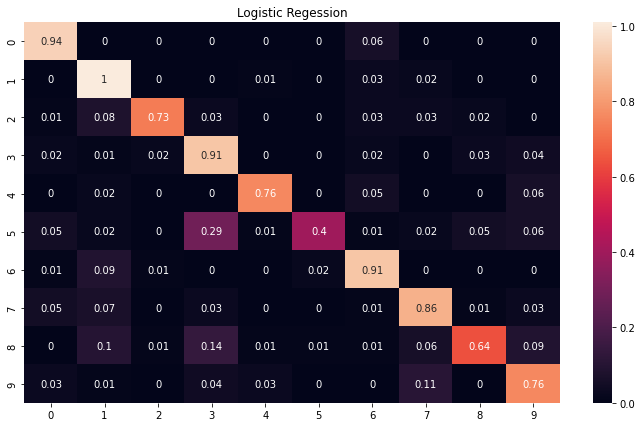

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
# constant for classes
classes = ('0','1', '2', '3', '4', '5',
        '6', '7', '8', '9')

# Build confusion matrix
cf_matrix = confusion_matrix(Y_test[0:1000], KNNpredict)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
pyplot.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True).set(title='K Nearest Neighbors')
cf_matrix = confusion_matrix(Y_test[0:1000], LogPredictionPart)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
pyplot.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True).set(title='Logistic Regession')

Error

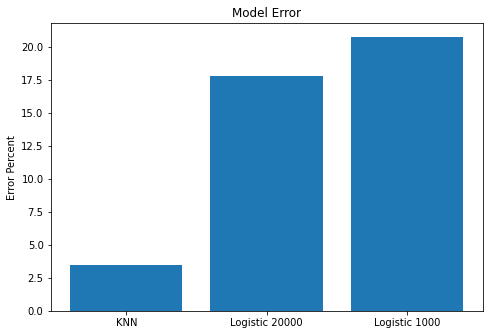

In [34]:
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
model = ['KNN', 'Logistic 20000', 'Logistic 1000']
modelerror = [results[2]*100,precenterrorAll*100,precenterrorPart*100]
ax.bar(model,modelerror)
ax.set_ylabel('Error Percent')
ax.set_title('Model Error')
pyplot.show()

Accuracy

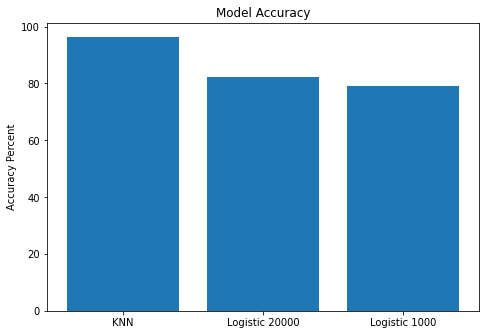

In [35]:
from sklearn.metrics import accuracy_score
AccKNN = accuracy_score(Y_test[0:1000],KNNpredict)
AccLogPart = accuracy_score(Y_test[0:1000],LogPredictionPart)
AccLogAll = accuracy_score(Y_test,LogPredictionAll)
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
model = ['KNN', 'Logistic 20000', 'Logistic 1000']
modelacc = [AccKNN*100,AccLogAll*100,AccLogPart*100]
ax.bar(model,modelacc)
ax.set_ylabel('Accuracy Percent')
ax.set_title('Model Accuracy')
pyplot.show()

As we see in the graph, KNN has a higher accuracy rate when compared to the logistic regression model trained on 20000 smaples and 1000 sampels. KNN has has a much lower error rate when compared to the other model. When comparing the confusion matrix, we would want the highest percent or numbers, depending on how the confusion matrix plots it's values, to be on the diagonal line of the matrix. This wouls signify that the model predicted the true label of the test sample. It can be seen that the confusion matrix of the KNN model has a much higher values on it's diagonal then compared to linear regression. But this higher accuracy comees with it's downfall. KNN is much more computationally complex twhe compared to linear regression. Computing the distance for such a large dataset can become computationally taxing on the computer and it's ram consumption. Due to this, it took the KNN model a much longer time to run then it's competing model. My final recommendation on the which method to use would be KNN. While it does take a really long time to compute, we can diminish the accuracy it was able to obtain in comparision to it's competing model. 